# Определение перспективного тарифа для телеком-компании

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Для этого предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении имеются данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше. 

В частности, нужно проверить две гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

## Изучение и предобработка данных

Осуществляется загрузка необходимых библиотек.

In [1]:
import pandas as pd #загружаем библиотеку pandas
import numpy as np #загружаем библиотеку numpy
import matplotlib.pyplot as plt #загружаем matplotlib.pyplot
from scipy import stats as st #загружаем stats из библиотеки scipy

Далее осуществляется последовательная загрузка и изучение файлов.

### Файл calls.csv

Осуществляется загрузка файла calls.csv и первичное знакомство с данными.

In [2]:
data_calls = pd.read_csv('/datasets/calls.csv') #считываем csv-файл

data_calls.info() #смотрим сводку основной информации
data_calls.head() #смотрим как отображаются данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Файл содержит информацию о звонках (дата, продолжительность) различных пользователей. При этом первичный обзор показывает, что в данных нет пропусков.

Рассмотрим подробнее описание значений в столбце duration.

In [3]:
data_calls['duration'].describe() #смотрим описание значений в столбце duration

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Максимальное значение выглядит приемлемым, а минимальные нулевые значения обозначают пропущенные звонки, поэтому их не нужно удалять.

В столбце call_date тип значений требуется поменять на формат даты.

In [4]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d') #переводим данные в формат даты в столбце call_date

Проводится проверка внесенных изменений.

In [5]:
data_calls.info() #смотрим сводку основной информации
data_calls.head() #смотрим как отображаются данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Тип столбца был корректно изменен.

### Файл internet.csv

Осуществляется загрузка файла internet.csv и первичное знакомство с данными.

In [6]:
data_internet = pd.read_csv('/datasets/internet.csv', index_col=0) #считываем csv-файл

data_internet.info() #смотрим сводку основной информации
data_internet.head() #смотрим как отображаются данные

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Файл содержит информацию об использовании интернета (дата, объем трафика) различными пользователями. При этом первичный обзор показывает, что в данных нет пропусков.

Рассмотрим подробнее описание значений в столбце mb_used.

In [7]:
data_internet['mb_used'].describe() #смотрим описание значений в столбце mb_used

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Так же как и в случае звонков с нулевой продолжительностью, интернет-сессии с нулевым трафиком можно считать несостоявшимися попытками выхода в интернет. Возможно будет целесообразным в дальнейшем удалить данные записи.

В столбце session_date тип значений также требуется поменять на формат даты.

In [8]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d') #переводим данные в формат даты в столбце session_date

Проводится проверка внесенных изменений.

In [9]:
data_internet.info() #смотрим сводку основной информации
data_internet.head() #смотрим как отображаются данные

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Тип столбца был корректно изменен.

### Файл messages.csv

Осуществляется загрузка файла messages.csv и первичное знакомство с данными.

In [10]:
data_messages = pd.read_csv('/datasets/messages.csv') #считываем csv-файл

data_messages.info() #смотрим сводку основной информации
data_messages.head() #смотрим как отображаются данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Файл содержит информацию о сообщениях (дата отправки) различных пользователей. При этом первичный обзор показывает, что в данных нет пропусков.

В столбце message_date тип значений также требуется поменять на формат даты.

In [11]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d') #переводим данные в формат даты в столбце message_date

Проводится проверка внесенных изменений.

In [12]:
data_messages.info() #смотрим сводку основной информации
data_messages.head() #смотрим как отображаются данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Тип столбца был корректно изменен.

### Файл tariffs.csv

Осуществляется загрузка файла tarrifs.csv и первичное знакомство с данными.

In [13]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv') #считываем csv-файл

data_tariffs.info() #смотрим сводку основной информации
data_tariffs.head() #смотрим как отображаются данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Файл содержит информацию о двух рассматриваемых тарифах (ежемесячная плата, включенные минуты/сообщения/трафик и стоимость услуг сверх пакета).

На текущем этапе исследования нет необходимости вносить какие-либо изменения в данную таблицу.

### Файл users.csv

Осуществляется загрузка файла users.csv и первичное знакомство с данными.

In [14]:
data_users = pd.read_csv('/datasets/users.csv') #считываем csv-файл

data_users.info() #смотрим сводку основной информации
data_users.head() #смотрим как отображаются данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Файл содержит информацию о пользователях (идентификатор, возраст, дата отключения от тарифа, город, имя, фамилия, дата регистрации и используемый тариф). При этом пропуски присутствуют в столбце churn_date, но это лишь означает, что тариф еще действовал на момент выгрузки данных. Оставим пока имеющиеся значения, и проследим как это повлияет на дальнейшие расчеты.

Для удобства определим на основе данной таблицы категорию города - Москва или другой регион. Для этого применим лямбда-функцию, возвращающую булевые значения.

In [15]:
data_users['capital'] = data_users['city'].apply(lambda x: x == "Москва") #добавляем столбец с определением категории региона

В столбцах churn_date и reg_date тип значений также требуется поменять на формат даты.

In [16]:
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d') #переводим данные в формат даты в столбце churn_date
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d') #переводим данные в формат даты в столбце reg_date

Проводится проверка внесенных изменений.

In [17]:
data_users.info() #смотрим сводку основной информации
data_users.head() #смотрим как отображаются данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
 8   capital     500 non-null    bool          
dtypes: bool(1), datetime64[ns](2), int64(2), object(4)
memory usage: 31.9+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,capital
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,True
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,False
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,True
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,False


Новый столбец успешно добавлен в таблицу, типы столбцов корректно изменены.

## Дополнительные расчеты и добавление данных

Сперва, для завершения подготовки данных, устраним нулевые значения трафика в таблице internet.

In [18]:
data_internet = data_internet[data_internet['mb_used'] > 0] #выбираем интернет-сессии с ненулевым трафиком

Повторно рассмотрим описание значений в столбце mb_used.

In [19]:
print(data_internet['mb_used'].describe()) #смотрим описание значений в столбце mb_used

data_internet #посмотрим на результат

count    129798.000000
mean        426.087210
std         255.596447
min           0.030000
25%         227.460000
50%         400.540000
75%         592.947500
max        1724.830000
Name: mb_used, dtype: float64


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149390,1499_151,752.72,2018-10-11,1499
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149394,1499_155,1246.32,2018-11-26,1499


Нулевые значения были устранены.

Далее для каждого пользователя будет определен набор основных показателей, рассчитанный по месяцам. Это, в том числе, потребует добавления в существующие таблицы новых столбцов для последующей группировки данных.

### Количество звонков и израсходованных минут

Для расчета показателей по месяцам добавим в таблицу calls столбец с номером месяца.

In [20]:
data_calls['month'] = data_calls['call_date'].dt.month #добавляем столбец с месяцем совершения звонка

Также добавим столбец с округленной вверх продолжительностью каждого звонка (так как даже если звонок длился всего 1 секунду, это будет засчитано как 1 минута) с присвоением ему целочисленного типа.

In [21]:
data_calls['duration_ceil'] = np.ceil(data_calls['duration']).astype('int') #добавляем столбец с округленной вверх продолжительностью звонков

Кроме того, на этом этапе нам скорее всего не понадобятся звонки с нулевой продолжительностью (они являются пропущенными и, вероятно, впоследствии состоялись, так что их учет в количестве звонков выглядит избыточным, а на сумму продолжительностей они все равно не повлияют).

In [22]:
data_calls = data_calls[data_calls['duration'] > 0] #выбираем звонки с ненулевой продолжительностью

Проводится проверка внесенных изменений.

In [23]:
data_calls.info() #смотрим сводку основной информации
data_calls.head() #смотрим как отображаются данные

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             162994 non-null  object        
 1   call_date      162994 non-null  datetime64[ns]
 2   duration       162994 non-null  float64       
 3   user_id        162994 non-null  int64         
 4   month          162994 non-null  int64         
 5   duration_ceil  162994 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 8.7+ MB


,id,call_date,duration,user_id,month,duration_ceil
2,1000_2,2018-06-11,2.85,1000,6,3
3,1000_3,2018-09-21,13.80,1000,9,14
4,1000_4,2018-12-15,5.18,1000,12,6
7,1000_7,2018-08-22,18.31,1000,8,19
8,1000_8,2018-09-15,18.44,1000,9,19


Новые столбцы успешно добавлены в таблицу, расчеты произведены корректно.

Теперь можем посчитать для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам за счет группировки данных.

In [24]:
data_calls_grouped = data_calls.pivot_table(index=['user_id', 'month'], values='duration_ceil', aggfunc=['count', 'sum']) #строим сводную таблицу с группировкой суммы продолжительности и числа звонков по идентификатору пользователя и месяцу

data_calls_grouped.columns = ['calls_count', 'calls_duration'] #для удобства переименуем названия столбцов

data_calls_grouped #посмотрим на результат

calls_count  calls_duration
user_id month                             
1000    5               17             159
        6               28             172
        7               41             340
        8               42             408
        9               46             466
...                    ...             ...
1498    10              30             247
1499    9                8              70
        10              44             449
        11              62             612
        12              56             492

[3168 rows x 2 columns]

Не по всем пользователям отображаются данные по 12 месяцам, так как кто-то мог подключиться к тарифу в течение года или, наоборот, отключиться от него в этот период.

### Количество отправленных сообщений

Аналогично для расчета показателей по месяцам добавим в таблицу messages столбец с номером месяца.

In [25]:
data_messages['month'] = data_messages['message_date'].dt.month #добавляем столбец с месяцем отправки сообщения

Проводится проверка внесенных изменений.

In [26]:
data_messages.info() #смотрим сводку основной информации
data_messages.head() #смотрим как отображаются данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Новый столбец успешно добавлен в таблицу.

Теперь можем посчитать для каждого пользователя количество отправленных сообщений по месяцам за счет группировки данных.

In [27]:
data_messages_grouped = data_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count') #строим сводную таблицу с группировкой числа сообщений по идентификатору пользователя и месяцу

data_messages_grouped.columns = ['messages_count'] #для удобства переименуем названия столбцов

data_messages_grouped #посмотрим на результат

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

И снова не по всем пользователям отображаются данные по 12 месяцам, так как кто-то мог подключиться к тарифу в течение года или отключиться от него в этот период.

### Объем израсходованного интернет-трафика

Аналогично для расчета показателей по месяцам добавим в таблицу internet столбец с номером месяца.

In [28]:
data_internet['month'] = data_internet['session_date'].dt.month #добавляем столбец с месяцем интернет-сессии

Проводится проверка внесенных изменений.

In [29]:
data_internet.info() #смотрим сводку основной информации
data_internet.head() #смотрим как отображаются данные

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            129798 non-null  object        
 1   mb_used       129798 non-null  float64       
 2   session_date  129798 non-null  datetime64[ns]
 3   user_id       129798 non-null  int64         
 4   month         129798 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.9+ MB


,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


Новый столбец успешно добавлен в таблицу.

Теперь можем посчитать для каждого пользователя количество использованных мегабайт по месяцам за счет группировки данных.

In [30]:
data_internet_grouped = data_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum') #строим сводную таблицу с группировкой объема трафика по идентификатору пользователя и месяцу

data_internet_grouped #посмотрим на результат

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3201 rows x 1 columns]

Также добавим столбец с округленным вверх месячным трафиком, пересчитанным в гигабайты (так как даже если абонент использует 1025 мегабайт в этом месяце, то это будет считаться за 2 гигабайта) с присвоением ему целочисленного типа.

In [31]:
data_internet_grouped['gb_used'] = np.ceil(data_internet_grouped['mb_used']/1024).astype('int') #добавляем столбец с округленным вверх трафиком в гигабайтах

data_internet_grouped #посмотрим на результат

mb_used  gb_used
user_id month                   
1000    5       2253.49        3
        6      23233.77       23
        7      14003.64       14
        8      14055.93       14
        9      14568.91       15
...                 ...      ...
1498    10     20579.36       21
1499    9       1845.75        2
        10     17788.51       18
        11     17963.31       18
        12     13055.58       13

[3201 rows x 2 columns]

Новый столбец успешно добавлен в таблицу, расчеты произведены корректно.

### Помесячная выручка с каждого пользователя 

Для реализации расчета выручки необходимо собрать предыдущие помесячные данные в единую таблицу.

In [32]:
data_grouped_all = data_internet_grouped.join([data_calls_grouped, data_messages_grouped], how='outer').drop('mb_used', axis=1) #объединяем три таблицы, убирая для удобства столбец mb_used

data_grouped_all.info() #смотрим сводку основной информации

data_grouped_all #посмотрим на результат

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gb_used         3201 non-null   float64
 1   calls_count     3168 non-null   float64
 2   calls_duration  3168 non-null   float64
 3   messages_count  2717 non-null   float64
dtypes: float64(4)
memory usage: 130.4 KB


gb_used  calls_count  calls_duration  messages_count
user_id month                                                      
1000    5          3.0         17.0           159.0            22.0
        6         23.0         28.0           172.0            60.0
        7         14.0         41.0           340.0            75.0
        8         14.0         42.0           408.0            81.0
        9         15.0         46.0           466.0            57.0
...                ...          ...             ...             ...
1498    10        21.0         30.0           247.0            42.0
1499    9          2.0          8.0            70.0            11.0
        10        18.0         44.0           449.0            48.0
        11        18.0         62.0           612.0            59.0
        12        13.0         56.0           492.0            66.0

[3214 rows x 4 columns]

В собранной таблице есть пропуски, так как в предыдущих таблицах было разное число записей, это говорит о том, что в какие-то месяцы люди, например, могли общаться только через интернет, без звонков и сообщений. Заменим такие пропуски на нули для корректного учета в дальнейшем анализе.

In [33]:
data_grouped_all = data_grouped_all.fillna(0) #заменим пропуски в таблице на нули

При этом следует отметить один важный момент. Поскольку единицей дальнейшего анализа станет месяц пользования услугами мобильного оператора, то нет ничего страшного в том, что в базе присутствуют пользователи, которые применяли тот или иной тариф не в течение всего года (наоборот, хуже было бы целиком исключить их из выборки, тем самым уменьшив её). Однако первый и/или последний месяц использования тарифа может быть непоказательным, так как, во-первых, месяц будет неполным, а во-вторых, возможно, окажется нетипичным с точки зрения поведения пользователя (пользователь почему-то же решил сменить тариф). Поэтому такие месяца лучше исключить из анализа.  

Для начала добавим в единую таблицу недостающие данные.

In [34]:
data_grouped_all.reset_index(inplace=True) #для удобства переназначим индексы

data_grouped_all = data_grouped_all.merge(data_users, on='user_id', how='left') #объединяем две таблицы на основе значений user_id

data_grouped_all #посмотрим на результат

,user_id,month,gb_used,calls_count,calls_duration,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,capital
0,1000,5,3.0,17.0,159.0,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False
1,1000,6,23.0,28.0,172.0,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False
2,1000,7,14.0,41.0,340.0,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False
3,1000,8,14.0,42.0,408.0,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False
4,1000,9,15.0,46.0,466.0,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,21.0,30.0,247.0,42.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,False
3210,1499,9,2.0,8.0,70.0,11.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,False
3211,1499,10,18.0,44.0,449.0,48.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,False
3212,1499,11,18.0,62.0,612.0,59.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,False


Для дальнейшего анализа также добавим в единую таблицу столбцы с номерами месяца регистрации/отключения тарифа.

In [35]:
data_grouped_all['reg_month'] = data_grouped_all['reg_date'].dt.month #добавляем столбец с месяцем регистрации тарифа
data_grouped_all['churn_month'] = data_grouped_all['churn_date'].dt.month #добавляем столбец с месяцем отключения тарифа

data_grouped_all #посмотрим на результат

,user_id,month,gb_used,calls_count,calls_duration,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,capital,reg_month,churn_month
0,1000,5,3.0,17.0,159.0,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False,5,NaN
1,1000,6,23.0,28.0,172.0,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False,5,NaN
2,1000,7,14.0,41.0,340.0,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False,5,NaN
3,1000,8,14.0,42.0,408.0,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False,5,NaN
4,1000,9,15.0,46.0,466.0,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,21.0,30.0,247.0,42.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,False,7,10.0
3210,1499,9,2.0,8.0,70.0,11.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,False,9,NaN
3211,1499,10,18.0,44.0,449.0,48.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,False,9,NaN
3212,1499,11,18.0,62.0,612.0,59.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,False,9,NaN


Оставим в таблице только те записи, где рассматриваемый месяц не совпадает с месяцем регистрации/отключения тарифа для каждого пользователя.

In [36]:
data_grouped_all = data_grouped_all.query('month != reg_month and month != churn_month') #делаем срез по "полноценным" месяцам

data_grouped_all #посмотрим на результат

,user_id,month,gb_used,calls_count,calls_duration,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,capital,reg_month,churn_month
1,1000,6,23.0,28.0,172.0,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False,5,NaN
2,1000,7,14.0,41.0,340.0,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False,5,NaN
3,1000,8,14.0,42.0,408.0,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False,5,NaN
4,1000,9,15.0,46.0,466.0,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False,5,NaN
5,1000,10,15.0,44.0,350.0,73.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,1498,8,24.0,43.0,400.0,62.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,False,7,10.0
3208,1498,9,22.0,53.0,471.0,44.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,False,7,10.0
3211,1499,10,18.0,44.0,449.0,48.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,False,9,NaN
3212,1499,11,18.0,62.0,612.0,59.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,False,9,NaN


Затем уберем из таблицы ненужные на этом этапе исследования столбцы и добавим детальную информацию по тарифам.

In [37]:
data_grouped_all = data_grouped_all.drop(['calls_count', 'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'reg_month', 'churn_month'], axis=1) #убираем ненужные столбцы

data_tariffs = data_tariffs.rename(columns={'tariff_name': 'tariff'}) #меняем название столбца в таблице тарифов для объединения таблиц

data_grouped_all = data_grouped_all.merge(data_tariffs, on='tariff', how='left') #объединяем две таблицы на основе значений tariff

data_grouped_all #посмотрим на результат

,user_id,month,gb_used,calls_duration,messages_count,tariff,capital,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,6,23.0,172.0,60.0,ultra,False,1000,30720,3000,1950,150,1,1
1,1000,7,14.0,340.0,75.0,ultra,False,1000,30720,3000,1950,150,1,1
2,1000,8,14.0,408.0,81.0,ultra,False,1000,30720,3000,1950,150,1,1
3,1000,9,15.0,466.0,57.0,ultra,False,1000,30720,3000,1950,150,1,1
4,1000,10,15.0,350.0,73.0,ultra,False,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,1498,8,24.0,400.0,62.0,smart,False,50,15360,500,550,200,3,3
2676,1498,9,22.0,471.0,44.0,smart,False,50,15360,500,550,200,3,3
2677,1499,10,18.0,449.0,48.0,smart,False,50,15360,500,550,200,3,3
2678,1499,11,18.0,612.0,59.0,smart,False,50,15360,500,550,200,3,3


Теперь все готово для расчета помесячной выручки. Сперва посчитаем перерасход минут разговоров/сообщений/трафика по каждому месяцу для каждого пользователя.

In [38]:
data_grouped_all['calls_excess'] = data_grouped_all.apply(lambda x: max((x['calls_duration'] - x['minutes_included']), 0), axis=1) #добавляем столбец с перерасходом минут разговоров
data_grouped_all['messages_excess'] = data_grouped_all.apply(lambda x: max((x['messages_count'] - x['messages_included']), 0), axis=1) #добавляем столбец с перерасходом сообщений
data_grouped_all['gb_excess'] = data_grouped_all.apply(lambda x: max((x['gb_used'] - x['mb_per_month_included']/1024), 0), axis=1) #добавляем столбец с перерасходом трафика

data_grouped_all #посмотрим на результат

,user_id,month,gb_used,calls_duration,messages_count,tariff,capital,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_excess,messages_excess,gb_excess
0,1000,6,23.0,172.0,60.0,ultra,False,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
1,1000,7,14.0,340.0,75.0,ultra,False,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
2,1000,8,14.0,408.0,81.0,ultra,False,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
3,1000,9,15.0,466.0,57.0,ultra,False,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
4,1000,10,15.0,350.0,73.0,ultra,False,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,1498,8,24.0,400.0,62.0,smart,False,50,15360,500,550,200,3,3,0.0,12.0,9.0
2676,1498,9,22.0,471.0,44.0,smart,False,50,15360,500,550,200,3,3,0.0,0.0,7.0
2677,1499,10,18.0,449.0,48.0,smart,False,50,15360,500,550,200,3,3,0.0,0.0,3.0
2678,1499,11,18.0,612.0,59.0,smart,False,50,15360,500,550,200,3,3,112.0,9.0,3.0


Наконец, рассчитаем помесячную выручку.

In [39]:
data_grouped_all['revenue'] = data_grouped_all['calls_excess']*data_grouped_all['rub_per_minute'] + data_grouped_all['messages_excess']*data_grouped_all['rub_per_message'] + data_grouped_all['gb_excess']*data_grouped_all['rub_per_gb'] + data_grouped_all['rub_monthly_fee'] #добавляем столбец с расчетом выручки

data_grouped_all #посмотрим на результат

,user_id,month,gb_used,calls_duration,messages_count,tariff,capital,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_excess,messages_excess,gb_excess,revenue
0,1000,6,23.0,172.0,60.0,ultra,False,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,7,14.0,340.0,75.0,ultra,False,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,8,14.0,408.0,81.0,ultra,False,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,9,15.0,466.0,57.0,ultra,False,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,10,15.0,350.0,73.0,ultra,False,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,1498,8,24.0,400.0,62.0,smart,False,50,15360,500,550,200,3,3,0.0,12.0,9.0,2386.0
2676,1498,9,22.0,471.0,44.0,smart,False,50,15360,500,550,200,3,3,0.0,0.0,7.0,1950.0
2677,1499,10,18.0,449.0,48.0,smart,False,50,15360,500,550,200,3,3,0.0,0.0,3.0,1150.0
2678,1499,11,18.0,612.0,59.0,smart,False,50,15360,500,550,200,3,3,112.0,9.0,3.0,1513.0


Выборочная проверка показывает, что расчеты были произведены корректно.

## Анализ данных

Для проведения дальнейшего анализа разобьем общую таблицу на две, исходя из категории используемого тарифа.

In [40]:
data_grouped_smart = data_grouped_all.query('tariff == "smart"') #делаем срез по тарифу smart
data_grouped_ultra = data_grouped_all.query('tariff == "ultra"') #делаем срез по тарифу ultra

data_grouped_smart.info() #смотрим сводку основной информации
print() #вставим пустую сроку
data_grouped_ultra.info() #смотрим сводку основной информации

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1857 entries, 7 to 2679
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                1857 non-null   int64  
 1   month                  1857 non-null   int64  
 2   gb_used                1857 non-null   float64
 3   calls_duration         1857 non-null   float64
 4   messages_count         1857 non-null   float64
 5   tariff                 1857 non-null   object 
 6   capital                1857 non-null   bool   
 7   messages_included      1857 non-null   int64  
 8   mb_per_month_included  1857 non-null   int64  
 9   minutes_included       1857 non-null   int64  
 10  rub_monthly_fee        1857 non-null   int64  
 11  rub_per_gb             1857 non-null   int64  
 12  rub_per_message        1857 non-null   int64  
 13  rub_per_minute         1857 non-null   int64  
 14  calls_excess           1857 non-null   float64
 15  mess

Мы получили две под-выборки, в сумме дающие число записей из общей обработанной выборки. 

Далее детально будут рассмотрены рассчитанные помесячные параметры количества минут разговоров/сообщений/трафика для каждого тарифа.

### Минуты разговора

Применяется описание значений и построение гистограммы для параметра calls_duration в тарифах smart и ultra.

count    1857.000000
mean      453.003770
std       176.314672
min         0.000000
25%       332.000000
50%       454.000000
75%       564.000000
max      1435.000000
Name: calls_duration, dtype: float64
31086.863671127885

count     823.000000
mean      572.928311
std       307.242082
min         0.000000
25%       346.500000
50%       565.000000
75%       779.000000
max      1673.000000
Name: calls_duration, dtype: float64
94397.69680091528


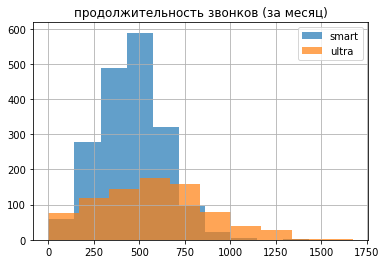

In [41]:
print(data_grouped_smart['calls_duration'].describe()) #смотрим описание значений в столбце calls_duration для тарифа smart
print(np.var(data_grouped_smart['calls_duration'], ddof=1)) #рассчитаем дисперсию для тарифа smart
print() #вставим пустую сроку
print(data_grouped_ultra['calls_duration'].describe()) #смотрим описание значений в столбце calls_duration для тарифа ultra
print(np.var(data_grouped_ultra['calls_duration'], ddof=1)) #рассчитаем дисперсию для тарифа ultra

data_grouped_smart['calls_duration'].hist(alpha=0.7, grid=True) #строим гистограмму для столбца calls_duration в тарифе smart
data_grouped_ultra['calls_duration'].hist(alpha=0.7, grid=True) #строим гистограмму для столбца calls_duration в тарифе ultra
plt.title('продолжительность звонков (за месяц)') #добавляем название
plt.legend(['smart', 'ultra']) #добавляем легенду

В типичном случае пользователи тарифа smart тратят в месяц 454 минуты разговоров (то есть примерно 7,5 часов), в пределах пакетного предложения. Максимум достигает 1435 минут (почти 24 часа), но гистограмма показывает, что это уникальный случай, "оторванный" от остального распределения.

Пользователи тарифа ultra, в свою очередь, тратят в месяц 565 минут разговоров (то есть примерно 9,5 часов). Максимум стал еще выше, но уже не выглядит столь необычно и даже находится в пределах включенного в пакет объема минут. Вообще дисперсия и стандартное отклонение значений в данном случае гораздо выше, чем в предыдущем варианте, и это отражается на графике - пик не такой "острый". Вероятно, пользователи с большим пакетом услуг меньше ограничивают себя в разговорах или даже тратят на это трафик вместо звонков, что объясняет большую частоту околонулевых значений.

### Количество сообщений

Применяется описание значений и построение гистограммы для параметра messages_count в тарифах smart и ultra.

count    1857.000000
mean       36.192246
std        28.730675
min         0.000000
25%        13.000000
50%        31.000000
75%        55.000000
max       143.000000
Name: messages_count, dtype: float64
825.4517070776003

count    823.000000
mean      53.017011
std       48.951435
min        0.000000
25%        7.000000
50%       42.000000
75%       83.000000
max      224.000000
Name: messages_count, dtype: float64
2396.2430192784686


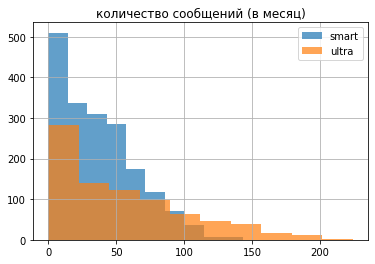

In [42]:
print(data_grouped_smart['messages_count'].describe()) #смотрим описание значений в столбце messages_count для тарифа smart
print(np.var(data_grouped_smart['messages_count'], ddof=1)) #рассчитаем дисперсию для тарифа smart
print() #вставим пустую сроку
print(data_grouped_ultra['messages_count'].describe()) #смотрим описание значений в столбце messages_count для тарифа ultra
print(np.var(data_grouped_ultra['messages_count'], ddof=1)) #рассчитаем дисперсию для тарифа ultra

data_grouped_smart['messages_count'].hist(alpha=0.7, grid=True) #строим гистограмму для столбца messages_count в тарифе smart
data_grouped_ultra['messages_count'].hist(alpha=0.7, grid=True) #строим гистограмму для столбца messages_count в тарифе ultra
plt.title('количество сообщений (в месяц)') #добавляем название
plt.legend(['smart', 'ultra']) #добавляем легенду

Медианное число сообщений в тарифе smart составляет 31 единицу, а график вообще имеет пик у нулевой отметки. Логично, что пользователи с пакетом всего в 50 бесплатных сообщений не очень активно задействуют эту форму связи.

Пик сообщений в тарифе ultra также располагается близко к нулю, хотя медиана (42) и максимум (224) все же выше, чем в тарифе smart. Снова преобладает общение через интернет-каналы? Проверим это.

### Интернет-трафик

Применяется описание значений и построение гистограммы для параметра gb_used в тарифах smart и ultra.

count    1857.000000
mean       17.637049
std         4.797706
min         2.000000
25%        14.000000
50%        17.000000
75%        21.000000
max        38.000000
Name: gb_used, dtype: float64
23.017980080032682

count    823.000000
mean      21.183475
std        9.252296
min        0.000000
25%       15.000000
50%       21.000000
75%       28.000000
max       49.000000
Name: gb_used, dtype: float64
85.60498206963427


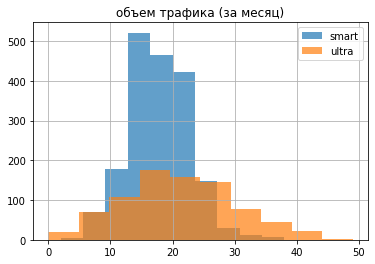

In [43]:
print(data_grouped_smart['gb_used'].describe()) #смотрим описание значений в столбце gb_used для тарифа smart
print(np.var(data_grouped_smart['gb_used'], ddof=1)) #рассчитаем дисперсию для тарифа smart
print() #вставим пустую сроку
print(data_grouped_ultra['gb_used'].describe()) #смотрим описание значений в столбце gb_used для тарифа ultra
print(np.var(data_grouped_ultra['gb_used'], ddof=1)) #рассчитаем дисперсию для тарифа ultra

data_grouped_smart['gb_used'].hist(alpha=0.7, grid=True) #строим гистограмму для столбца gb_used в тарифе smart
data_grouped_ultra['gb_used'].hist(alpha=0.7, grid=True) #строим гистограмму для столбца gb_used в тарифе ultra
plt.title('объем трафика (за месяц)') #добавляем название
plt.legend(['smart', 'ultra']) #добавляем легенду

Среднее значение в тарифе smart близко к медианному и составляет около 17 гигабайт, при этом большинство значений лежит в диапазоне 14-21 гигабайт. Видимо, пользователи пытаются оставаться в рамках пакета, но далеко не всем это удается.

Среднее и медиана в тарифе ultra не так сильно отличаются от тарифа smart и составляют 21 гигабайт, а вот разброс значений гораздо выше. График также выглядит более пологим, причем в отличие от продолжительности звонков, он явно медленнее спадает в сторону увеличения значений, что в целом подтверждает предположения о возможной замене обычных видов связи (звонки и сообщения) на мессенджеры и тому подобные интернет-альтернативы.

## Проверка гипотез

Для проведения дальнейшего анализа также разобьем общую таблицу на две, исходя из категории региона.

In [44]:
data_grouped_capital = data_grouped_all.query('capital == 1') #делаем срез по столице
data_grouped_region = data_grouped_all.query('capital == 0') #делаем срез по другим регионам

data_grouped_capital.info() #смотрим сводку основной информации
print() #вставим пустую сроку
data_grouped_region.info() #смотрим сводку основной информации

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 7 to 2638
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                503 non-null    int64  
 1   month                  503 non-null    int64  
 2   gb_used                503 non-null    float64
 3   calls_duration         503 non-null    float64
 4   messages_count         503 non-null    float64
 5   tariff                 503 non-null    object 
 6   capital                503 non-null    bool   
 7   messages_included      503 non-null    int64  
 8   mb_per_month_included  503 non-null    int64  
 9   minutes_included       503 non-null    int64  
 10  rub_monthly_fee        503 non-null    int64  
 11  rub_per_gb             503 non-null    int64  
 12  rub_per_message        503 non-null    int64  
 13  rub_per_minute         503 non-null    int64  
 14  calls_excess           503 non-null    float64
 15  messa

Мы снова получили две под-выборки, в сумме дающие число записей из общей обработанной выборки. 

Теперь можно перейти к непосредственной проверке гипотез.

### Первая гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

В этом случае нулевая гипотеза будет сформулирована, исходя из принципа равенства, а альтернативная - как противоположная нулевой:
- h0: средние выручки от пользователей тарифов «Ультра» и «Смарт» равны;
- h1: средние выручки от пользователей тарифов «Ультра» и «Смарт» не равны.

Так как полученные под-выборки различаются по размеру, используем t-тест с заданным параметром equal_var.

In [45]:
result = st.ttest_ind(data_grouped_smart['revenue'], data_grouped_ultra['revenue'], equal_var=False) #получаем результат теста

result.pvalue #смотрим на значение

2.8225982252018058e-157

Значение p-value крайне мало и явно меньше критерия значимости. Следовательно, нулевую гипотезу можно отвергнуть и считать, что средняя выручка пользователей тарифов «Ультра» и «Смарт» действительно различается.¶

In [46]:
print(data_grouped_smart['revenue'].describe()) #смотрим описание значений в столбце revenue
print() #вставим пустую сроку
print(data_grouped_ultra['revenue'].describe()) #смотрим описание значений в столбце revenue

count    1857.000000
mean     1407.509424
std       829.706969
min       550.000000
25%       745.000000
50%      1163.000000
75%      1923.000000
max      6770.000000
Name: revenue, dtype: float64

count     823.000000
mean     2091.980559
std       406.796086
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue, dtype: float64


Если посмотреть на средние значения выручки в двух этих группах, то в тарифе "Ультра" средняя выручка действительно окажется заметно выше, чем в тарифе "Смарт" (хотя в тарифе "Смарт" больше максимум - вероятно, из-за какого-то случая неаккуратного перерасхода пакета). При этом также стоит заметить, что все квартили в тарифе "Ультра" находятся на уровне стоимости базового пакета услуг.

### Вторая гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Нулевая и альтернативная гипотеза будут сформулированы схожим образом:
- h0: средние выручки от пользователей из Москвы и других регионов равны;
- h1: средние выручки от пользователей из Москвы и других регионов не равны.

Применим аналогичный статистический инструментарий:

In [47]:
result = st.ttest_ind(data_grouped_capital['revenue'], data_grouped_region['revenue'], equal_var=False) #получаем результат теста

result.pvalue #смотрим на значение

0.38005021534924466

Значение p-value достаточно высоко и очевидно превышает критерий значимости. Значит нулевую гипотезу нельзя отвергнуть и дальше следует исходить из предпосылки, что средняя выручка пользователей не различается между Москвой и другими регионами.¶

In [48]:
print(data_grouped_capital['revenue'].describe()) #смотрим описание значений в столбце revenue
print() #вставим пустую сроку
print(data_grouped_region['revenue'].describe()) #смотрим описание значений в столбце revenue

count     503.000000
mean     1644.119284
std       734.790236
min       550.000000
25%       996.500000
50%      1950.000000
75%      1950.000000
max      5321.000000
Name: revenue, dtype: float64

count    2177.000000
mean     1611.599908
std       804.805836
min       550.000000
25%       950.000000
50%      1750.000000
75%      1950.000000
max      6770.000000
Name: revenue, dtype: float64


Действительно, средние значения выручки в двух этих группах достаточно близки. Теперь этот факт подкреплен статистически. 

## Выводы

В ходе исследования тарифов телеком-компании «Мегалайн» был выполнен ряд основных блоков работ:
1. Предобработка данных и дополнительные расчеты:
   - по итогам оценки данных из выборки были исключены интернет-сессии с нулевым трафиком и звонки с нулевой продолжительностью;
   - были рассчитаны помесячные значения числа звонков и минут разговора/количества сообщений/объема интернет-трафика;
   - при этом из анализа были исключены "неполные" месяца (когда пользователь только начал или, наоборот, закончил пользоваться тарифом); 
   - наконец, исходя из особенностей каждого тарифа, была посчитана помесячная выручка от различных пользователей.
   
   
2. Анализ данных:
   - более подробное сравнение параметров по двум тарифам показало, что тариф "Ультра" в целом характеризуется более высокими параметрами использования минут/сообщений/гигабайт в сравнении с тарифом "Смарт", а также обладает большим разбросом указанных значений в связи с большим размером самого тарифного пакета;
   - люди в целом склонны вести коммуникации через интернет, а не через звонки и сообщения, часто заменяя один канал связи другим, особенно это выражено в тарифе "Ультра", где перерасхода звонков и сообщений за месяц вообще не наблюдается, в отличие от гигабайт трафика. 
   
   
3. Проверка гипотез:
   - статистика подтверждает, что средняя выручка пользователей тарифов «Ультра» и «Смарт» значимо различается (нулевая гипотеза о равенстве выручки в этом случае была отвергнута при значении p-value 2.8e-157 и 5%-ом уровне значимости);
   - при этом среднее значение выручки в выборке по тарифу "Смарт" составляет 1408 руб. и не доходит даже до стандартной ежемесячной платы по тарифу "Ультра", который стоит 1950 руб. и пользователи которого обычно остаются в рамках пакета без переплат;
   - по регионам (Москва и прочие) выручка пользователей, напротив, практически не различается (нулевая гипотеза о равенстве выручки в этом случае не могла быть отвергнута при значении p-value 0.38 и 5%-ом уровне значимости).

## Итоговый вывод

Тариф "Ультра" лучше тарифа "Смарт" с той точки зрения, что средняя выручка пользователей тарифа "Ультра" значимо выше, чем средняя выручка пользователей тарифа "Смарт" - 2092 руб. против 1408 руб. (на основе данных выборки)